# Simultaneously fit multiple lightcurves with airmass detrending

Here we will fit multiple lightcurves simultaneously using the global fitter in exotic. We will set up bounds for each lightcurve that specify what parameters to fit along with 'global' bounds that are shared between all lightcurves. 

![](https://s3.amazonaws.com/aasie/images/0004-6256/164/5/null/ajac8deef3_hr.jpg)

This notebook will show you how to reproduce something similar to Figure 4 in a study on HD 80606 b, https://ui.adsabs.harvard.edu/abs/2022AJ....164..178P/abstract 

Please cite that paper if you use this code

## Find lightcurve data in the Exoplanet Watch Database

The command `get` will fetch priors, light curves and an ephemeris (O-C) for each target.

In [1]:
from exotic.api.ew import ExoplanetWatch
from IPython.display import display, Image

# This will load the results JSON from the link above
EW = ExoplanetWatch()
print(EW.target_list)

# names are case and space sensitive
target = 'WASP-77 A b'
result = EW.get(target)

# list the result properties
result.__dict__.keys()

Loaded 321 targets
['CoRoT-11 b', 'CoRoT-14 b', 'CoRoT-18 b', 'CoRoT-1 b', 'CoRoT-27 b', 'CoRoT-29 b', 'CoRoT-2 b', 'CoRoT-5 b', 'CoRoT-7 b', 'CoRoT-8 b', 'CoRoTID 223977153 b', 'EPIC 206042996 c', 'Gaia-1 b', 'Gaia-2 b', 'GJ 1214 b', 'GJ 3470 b', 'GJ 436 b', 'GPX-1 b', 'HAT-P-11 b', 'HAT-P-12 b', 'HAT-P-13 b', 'HAT-P-16 b', 'HAT-P-17 b', 'HAT-P-18 b', 'HAT-P-19 b', 'HAT-P-1 b', 'HAT-P-20 b', 'HAT-P-21 b', 'HAT-P-22 b', 'HAT-P-23 b', 'HAT-P-25 b', 'HAT-P-26 b', 'HAT-P-27 b', 'HAT-P-28 b', 'HAT-P-29 b', 'HAT-P-30 b', 'HAT-P-32 b', 'HAT-P-33 b', 'HAT-P-36 b', 'HAT-P-37 b', 'HAT-P-39 b', 'HAT-P-3 b', 'HAT-P-41 b', 'HAT-P-44 b', 'HAT-P-45 b', 'HAT-P-49 b', 'HAT-P-4 b', 'HAT-P-50 b', 'HAT-P-51 b', 'HAT-P-52 b', 'HAT-P-53 b', 'HAT-P-54 b', 'HAT-P-55 b', 'HAT-P-56 b', 'HAT-P-57 b', 'HAT-P-59 b', 'HAT-P-5 b', 'HAT-P-68 b', 'HAT-P-6 b', 'HAT-P-70 b', 'HAT-P-7 b', 'HAT-P-8 b', 'HAT-P-9 b', 'HATS-18 b', 'HATS-22 b', 'HATS-24 b', 'HATS-2 b', 'HATS-33 b', 'HATS-38 b', 'HATS-44 b', 'HATS-67 b', 'HAT

dict_keys(['raw_result', 'host', 'name', 'priors', 'timestamp', 'identifier', 'reduction_count', 'observation_count', 'ephemeris', 'observations'])

## Priors
A list of stellar and planetary parameters with references. These are used to calculate a light curve model with non-linear limb darkening.

In [2]:
result.priors

{'R*': {'units': 'Sol',
  'value': '0.95',
  'reference': 'Kokori%20et%20al.%202022',
  'uncertainty': '0.01'},
 'RA': {'units': 'decimal',
  'value': '37.1555223',
  'reference': None,
  'uncertainty': None},
 'Rp': {'units': 'R_Earth',
  'value': '13.79',
  'reference': 'Cort&eacute;s-Zuleta%20et%20al.%202020',
  'uncertainty': '0.35'},
 'T*': {'units': 'K',
  'value': '5500.0',
  'reference': 'Kokori%20et%20al.%202022',
  'uncertainty': '80.0'},
 'Tc': {'units': 'BJD-TDB',
  'value': '2457658.8889',
  'reference': 'Ivshina%20&amp;%20Winn%202022',
  'uncertainty': '0.00014'},
 'DEC': {'units': 'decimal',
  'value': '-7.0606675',
  'reference': None,
  'uncertainty': None},
 'Tcs': [{'units': 'BJD, BJD-TDB',
   'value': '2455870.4500266667',
   'reference': 'Bonomo%20et%20al.%202017,%20Turner%20et%20al.%202016,%20Maxted%20et%20al.%202013',
   'uncertainty': '0.00014'},
  {'units': 'BJD-TDB',
   'value': '2456663.34757',
   'reference': 'Kokori%20et%20al.%202022',
   'uncertainty': '0.

In [3]:
result.ephemeris.keys()

dict_keys(['Tc', 'Tcs', 'files', 'notes', 'Period', 'Tc_err', 'epochs', 'Tcs_err', 'datasets', 'nea_tmids', 'residuals', 'timesaved', 'Period_err', 'nea_epochs', 'nea_tmids_err', 'nea_references', 'ephemeris_url'])

## Observations
A list of observations for each target. These are used to fit the light curve model to the data.

In [4]:
len(result.observations)

21

In [5]:
# list the properties
print(result.observations[0].__dict__.keys())

dict_keys(['raw_observation', 'name', 'files', 'filter', 'obscode', 'identifier', 'secondary_obscodes', 'errors', 'parameters', 'lightcurve_url', 'posterior_url'])


In [6]:
# print the best-fit parameters
priors = result.observations[0].parameters
priors

{'u0': 1.962057275383782,
 'u1': -3.5305462818456728,
 'u2': 4.032734388296143,
 'u3': -1.4642453818342522,
 'ecc': 0.0074,
 'inc': 88.91,
 'omega': -166.0,
 'duration': 0.0943,
 'tmid': 2458802.67,
 'a1': 23068.01,
 'a2': -0.135,
 'ars': 5.23,
 'rprs': 0.133,
 'per': 1.36002869}

In [7]:
# show the light curve
#for i in range(len(result.observations)):
#    display(Image(url=result.observations[i].lightcurve_url))

# Download the light curve data

In [8]:
time, flux, fluxerr, airmass, airmasscorr = result.observations[0].get_data()

Text(0, 0.5, 'Rel. Flux')

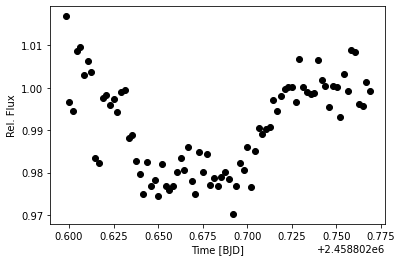

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# plot the data after detrending
plt.plot(time, flux/airmasscorr, 'ko')
plt.xlabel("Time [BJD]")
plt.ylabel("Rel. Flux")

    Done!
Checking exotethys database...
Checking ephemerides database...
Checking photometry database...
Checking catalogues database...
    Done!
    Done!
	Updating:  ecc_planets.yaml
    Done!
	Updating:  ecc_stars.yaml
    Done!


Text(0, 0.5, 'Rel. Flux')

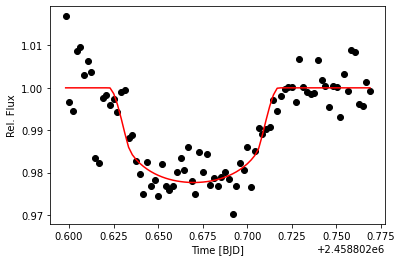

In [10]:
# let's over plot the transit model too
from exotic.api.elca import transit

plt.plot(time, flux/airmasscorr, 'ko')
plt.plot(time, transit(time, result.observations[0].parameters), 'r-')
plt.xlabel("Time [BJD]")
plt.ylabel("Rel. Flux")

## Fit a single lightcurve using EXOTIC

In [11]:
from exotic.api.elca import lc_fitter

# only define bounds for the "free" parameters during fitting
mybounds = {
    # [lower, upper]
    'rprs':[0,0.2],
    'tmid':[ result.ephemeris['Tc']-0.02,
             result.ephemeris['Tc']+0.02],
    'inc':[ priors['inc']-3, min(90,priors['inc']+3)],
    'a2':[-0.5,0.5] # airmass curvature
}

myfit = lc_fitter(time, flux, fluxerr, airmass,
                  result.observations[0].parameters, # priors
                  mybounds, mode='ns' )  # ns = nested sampling, slow but robust + posteriors
                                         # lm = levenberg mardquart, fast but no uncertainties

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-7e+01   [-69.6115..-69.6114]*| it/evals=6750/16842 eff=41.0534% N=400    0  00  0 
[ultranest] Likelihood function evaluations: 16858
[ultranest]   logZ = -81.82 +- 0.09977
[ultranest] Effective samples strategy satisfied (ESS = 1928.4, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.08 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.10, need <0.5)
[ultranest]   logZ error budget: single: 0.16 bs:0.10 tail:0.01 total:0.10 required:<0.50
[ultranest] done iterating.


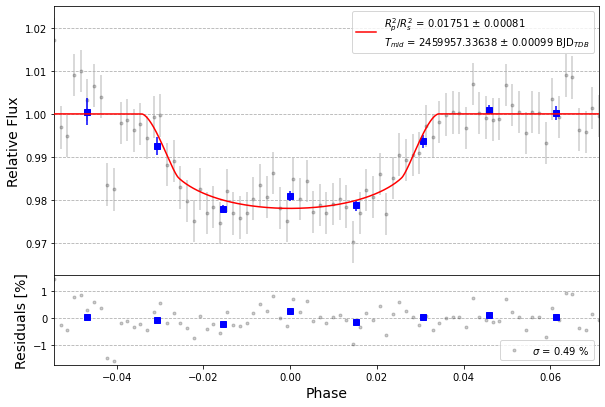

In [12]:
myfit.plot_bestfit()
plt.show()

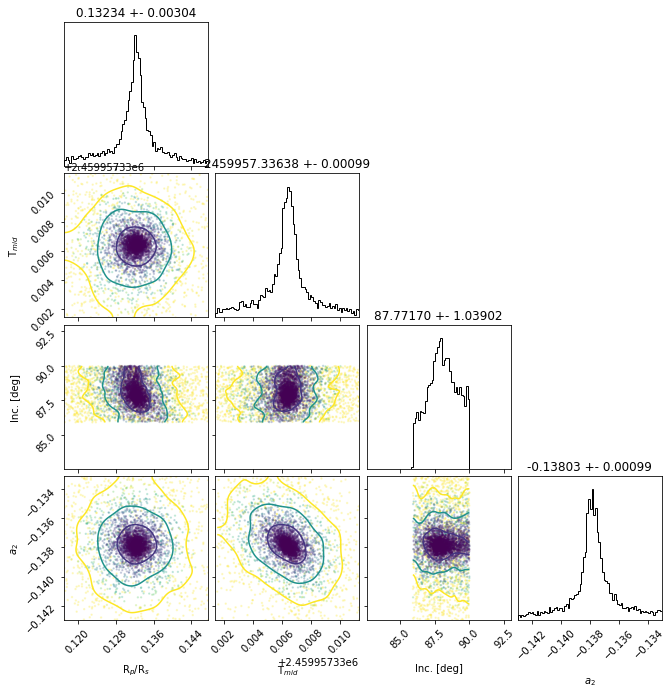

In [13]:
# show the posterior distributions
myfit.plot_triangle()
plt.show()

# Fit multiple light curves

We're going to optimize the multi-lightcurve fit by fitting the lightcurves simultaneously. This will allow us to fit for the same parameters across all lightcurves.

In [14]:
from astropy.time import Time
from copy import deepcopy
from exotic.api.elca import glc_fitter

# prep data for global fitter
input_data = []

# free parameters for each light curve
local_bounds = []

# aavso files on EW
for n,obs in enumerate(result.observations):

    try:
        time, flux, fluxerr, airmass, airmasscorr = obs.get_data()
    except:
        data = obs.get_data()
        time, flux, fluxerr, airmass = data[:,0], data[:,1], data[:,2], data[:,3]

    # copy default priors
    prior = deepcopy(result.observations[n].parameters)

    # compute tmid closest to observations
    tmid = prior['tmid']
    per = prior['per']
    obs_time = 0.5*(time.min() + time.max())
    obs_tmid = tmid + per*np.round((obs_time - tmid)/per)

    # mask out nans and 0 errors
    mask = np.isnan(flux) | (fluxerr <= 0) | np.isnan(fluxerr) | (airmass <= 1)
    
    if mask.sum() == len(flux):
        continue

    time = time[~mask]
    flux = flux[~mask]
    fluxerr = fluxerr[~mask]
    airmass = airmass[~mask]

    # only define bounds for the "free" parameters during fitting
    mybounds = {
        # [lower, upper]
        'rprs':[0, prior['rprs']*2],
        'tmid':[ obs_tmid-0.05,
                 obs_tmid+0.05],
        'inc':[ priors['inc']-3, min(90,priors['inc']+3)],
        'a2':[-0.5,0.5] # airmass curvature
    }

    try:
        myfit = lc_fitter(time, flux, fluxerr, airmass,
                        priors, mybounds, mode='ns' )  # ns = nested sampling, slow but robust + posteriors
                                                       # lm = levenberg mardquart, fast but uncertainties may be wrong
    except:
        print(f"Failed to fit {obs.obscode['id']}")
        continue

    # ignore noisy data
    if np.std(flux) > 0.03:
        continue
    else:
        prior = deepcopy(result.observations[n].parameters)

        # add data to list
        input_data.append({
            'time':time,
            'flux':myfit.detrended,
            'ferr':myfit.detrendederr,
            'airmass':np.zeros_like(time),
            'priors':prior,
            'name':f"{obs.obscode['id']}",

            # save individual fit parameters
            'parameters':myfit.parameters,
            'errors':myfit.errors,
            'res_std':myfit.res_stdev
        })

        # add parameter for individual airmass detrending
        local_bounds.append({}) 

    # print some timing info
    mint = Time(input_data[-1]['time'].min(),format='jd').isot
    maxt = Time(input_data[-1]['time'].max(),format='jd').isot
    maxphase = (input_data[-1]['time'].max() - prior['tmid'])/prior['per']
    minphase = (input_data[-1]['time'].min() - prior['tmid'])/prior['per']
    print(f"{input_data[-1]['name']} {len(input_data)} : {mint} ({minphase:.4f}) - {maxt} ({maxphase:.4f})")

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-7e+01   [-69.5964..-69.5963]*| it/evals=7320/19805 eff=37.7222% N=400    0 0 0  0 
[ultranest] Likelihood function evaluations: 19879
[ultranest]   logZ = -83.28 +- 0.1354
[ultranest] Effective samples strategy satisfied (ESS = 1993.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.06 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.14, need <0.5)
[ultranest]   logZ error budget: single: 0.17 bs:0.14 tail:0.01 total:0.14 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-8e+01   [-82.5404..-82.5398]*| it/evals=3748/21062 eff=18.1396% N=400  
[ultranest] Likelihood function evaluations: 21086
[ultranest]   logZ = -87.14 +- 0.06785
[ultranest] Effective samples strategy satisfied (ESS = 1506.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.07, need <0.5)
[ultranest]   logZ error budget: single: 0.09 bs:0.07 tail:0.01 total:0.07 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-6e+01   [-63.5576..-63.5569]*| it/evals=6480/19121 eff=34.6135% N=400   0  0 
[ultranest] Likelihood function evaluations: 19152
[ultranest]   logZ = -75.1 +- 0.1071
[ultranest] Effective samples strategy satisfied (ESS = 2122.0, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.08 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest]   logZ error budget: single: 0.16 bs:0.11 tail:0.01 total:0.11 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-7e+01   [-74.7956..-74.7953]*| it/evals=6390/34887 eff=18.5287% N=400   0  0 
[ultranest] Likelihood function evaluations: 34955
[ultranest]   logZ = -86.09 +- 0.1137
[ultranest] Effective samples strategy satisfied (ESS = 2337.7, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.05 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest]   logZ error budget: single: 0.15 bs:0.11 tail:0.01 total:0.11 required:<0.50
[ultranest] done iterating.
FMAA 1 : 2020-10-24T04:15:46.520 (-0.0611) - 2020-10-24T08:24:37.407 (0.0660)
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-7e+01   [-70.7009..-70.7009]*| it/evals=7023/21069 eff=33.9784% N=400   0  
[ultranest] Likelihood function evaluations: 21107
[ultranest]   logZ = -83.59 +- 0.114
[ultranest] Effective samples strategy satisfied (ESS = 2315.2, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.05 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest]   logZ error budget: single: 0.16 bs:0.11 tail:0.01 total:0.11 required:<0.50
[ultranest] done iterating.
FMAA 2 : 2020-10-28T06:10:06.251 (-0.0600) - 2020-10-28T10:26:06.868 (0.0707)
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-4e+01   [-38.4563..-38.4562]*| it/evals=6593/21859 eff=30.7237% N=400   
[ultranest] Likelihood function evaluations: 21880
[ultranest]   logZ = -50.26 +- 0.1103
[ultranest] Effective samples strategy satisfied (ESS = 2386.7, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest]   logZ error budget: single: 0.15 bs:0.11 tail:0.01 total:0.11 required:<0.50
[ultranest] done iterating.
BTSB 3 : 2021-09-18T07:29:03.908 (-0.0526) - 2021-09-18T11:53:05.427 (0.0822)
Failed to fit KADB
[ultranest] Sampling 400 live points from prior ...


/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: divide by zero encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:337: RuntimeWarning: invalid value encountered in multiply
  model *= np.median(detrend)
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:335: RuntimeWarning: overflow encountered in exp
  model *= np.exp(self.prior['a2'] * self.airmass)


[ultranest] Explored until L=-6e+02  .62 [-579.7849..-579.7848]*| it/evals=8100/22347 eff=36.9071% N=400   00  
[ultranest] Likelihood function evaluations: 22371
[ultranest]   logZ = -595.4 +- 0.1232
[ultranest] Effective samples strategy satisfied (ESS = 2163.7, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.09 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.12, need <0.5)
[ultranest]   logZ error budget: single: 0.18 bs:0.12 tail:0.01 total:0.12 required:<0.50
[ultranest] done iterating.
KADB 4 : 2021-11-06T06:36:32.314 (-0.0565) - 2021-11-06T10:32:41.654 (0.0641)
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-4e+02  .33 [-381.4710..-381.4710]*| it/evals=7880/20881 eff=38.4747% N=400 0 0  0 
[ultranest] Likelihood function evaluations: 20923
[ultranest]   logZ = -396.5 +- 0.1311
[ultranest] Effective samples strategy satisfied (ESS = 2082.0, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.48+-0.11 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.13, need <0.5)
[ultranest]   logZ error budget: single: 0.18 bs:0.13 tail:0.01 total:0.13 required:<0.50
[ultranest] done iterating.
KADB 5 : 2021-11-28T01:21:27.994 (-0.0408) - 2021-11-28T04:44:29.789 (0.0628)
[ultranest] Sampling 400 live points from prior ...
[ultranest] Widening roots to 600 live points (have 400 already) ...
[ultranest] Sampling 200 live points from prior ...


/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: divide by zero encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:335: RuntimeWarning: overflow encountered in exp
  model *= np.exp(self.prior['a2'] * self.airmass)
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:338: RuntimeWarning: overflow encountered in square
  return -np.sum(((self.data - model) / self.dataerr) ** 2)
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: overflow encountered in true_divide
  detrend = self.data / model  # used to estimate a1


[ultranest] Widening roots to 888 live points (have 600 already) ...
[ultranest] Sampling 288 live points from prior ...


/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: divide by zero encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:335: RuntimeWarning: overflow encountered in exp
  model *= np.exp(self.prior['a2'] * self.airmass)
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:338: RuntimeWarning: overflow encountered in square
  return -np.sum(((self.data - model) / self.dataerr) ** 2)
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: overflow encountered in true_divide
  detrend = self.data / model  # used to estimate a1


/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: divide by zero encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: overflow encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:335: RuntimeWarning: overflow encountered in exp
  model *= np.exp(self.prior['a2'] * self.airmass)
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: divide by zero encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: overflow encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:335: RuntimeWarn

/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: divide by zero encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:335: RuntimeWarning: overflow encountered in exp
  model *= np.exp(self.prior['a2'] * self.airmass)
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: overflow encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:335: RuntimeWarning: overflow encountered in exp
  model *= np.exp(self.prior['a2'] * self.airmass)
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: divide by zero encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: overf

/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:335: RuntimeWarning: overflow encountered in exp
  model *= np.exp(self.prior['a2'] * self.airmass)
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: divide by zero encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:338: RuntimeWarning: overflow encountered in square
  return -np.sum(((self.data - model) / self.dataerr) ** 2)
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:335: RuntimeWarning: overflow encountered in exp
  model *= np.exp(self.prior['a2'] * self.airmass)
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: divide by zero encountered in true_divide
  detrend = self.data / model  # used to estimate a1


/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: divide by zero encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:335: RuntimeWarning: overflow encountered in exp
  model *= np.exp(self.prior['a2'] * self.airmass)
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: divide by zero encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:335: RuntimeWarning: overflow encountered in exp
  model *= np.exp(self.prior['a2'] * self.airmass)


/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: divide by zero encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:335: RuntimeWarning: overflow encountered in exp
  model *= np.exp(self.prior['a2'] * self.airmass)
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:338: RuntimeWarning: overflow encountered in square
  return -np.sum(((self.data - model) / self.dataerr) ** 2)
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: divide by zero encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:335: RuntimeWarning: overflow encountered in exp
  model *= np.exp(self.prior['a2'] * self.airmass)


/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: divide by zero encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:335: RuntimeWarning: overflow encountered in exp
  model *= np.exp(self.prior['a2'] * self.airmass)
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:338: RuntimeWarning: overflow encountered in square
  return -np.sum(((self.data - model) / self.dataerr) ** 2)
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: divide by zero encountered in true_divide
  detrend = self.data / model  # used to estimate a1


/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:335: RuntimeWarning: overflow encountered in exp
  model *= np.exp(self.prior['a2'] * self.airmass)
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: divide by zero encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:335: RuntimeWarning: overflow encountered in exp
  model *= np.exp(self.prior['a2'] * self.airmass)


/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: divide by zero encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:335: RuntimeWarning: overflow encountered in exp
  model *= np.exp(self.prior['a2'] * self.airmass)
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: divide by zero encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:338: RuntimeWarning: overflow encountered in square
  return -np.sum(((self.data - model) / self.dataerr) ** 2)
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:335: RuntimeWarning: overflow encountered in exp
  model *= np.exp(self.prior['a2'] * self.airmass)


/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:335: RuntimeWarning: overflow encountered in exp
  model *= np.exp(self.prior['a2'] * self.airmass)
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: divide by zero encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:338: RuntimeWarning: overflow encountered in square
  return -np.sum(((self.data - model) / self.dataerr) ** 2)
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: divide by zero encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:335: RuntimeWarning: overflow encountered in exp
  model *= np.exp(self.prior['a2'] * self.airmass)


/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:338: RuntimeWarning: overflow encountered in square
  return -np.sum(((self.data - model) / self.dataerr) ** 2)
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: divide by zero encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:335: RuntimeWarning: overflow encountered in exp
  model *= np.exp(self.prior['a2'] * self.airmass)


/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:338: RuntimeWarning: overflow encountered in square
  return -np.sum(((self.data - model) / self.dataerr) ** 2)
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: divide by zero encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:335: RuntimeWarning: overflow encountered in exp
  model *= np.exp(self.prior['a2'] * self.airmass)
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:338: RuntimeWarning: overflow encountered in square
  return -np.sum(((self.data - model) / self.dataerr) ** 2)
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: divide by zero encountered in true_divide
  detrend = self.data / model  # used to estimate a1


/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:335: RuntimeWarning: overflow encountered in exp
  model *= np.exp(self.prior['a2'] * self.airmass)
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:338: RuntimeWarning: overflow encountered in square
  return -np.sum(((self.data - model) / self.dataerr) ** 2)
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: divide by zero encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:335: RuntimeWarning: overflow encountered in exp
  model *= np.exp(self.prior['a2'] * self.airmass)
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:338: RuntimeWarning: overflow encountered in square
  return -np.sum(((self.data - model) / self.dataerr) ** 2)


/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: overflow encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: divide by zero encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:338: RuntimeWarning: overflow encountered in square
  return -np.sum(((self.data - model) / self.dataerr) ** 2)
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:335: RuntimeWarning: overflow encountered in exp
  model *= np.exp(self.prior['a2'] * self.airmass)
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: overflow encountered in true_divide
  detrend = self.data / model  # used to estimate a1


/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: divide by zero encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:338: RuntimeWarning: overflow encountered in square
  return -np.sum(((self.data - model) / self.dataerr) ** 2)
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:335: RuntimeWarning: overflow encountered in exp
  model *= np.exp(self.prior['a2'] * self.airmass)
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: overflow encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: divide by zero encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:335: RuntimeWa

/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: overflow encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: divide by zero encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:338: RuntimeWarning: overflow encountered in square
  return -np.sum(((self.data - model) / self.dataerr) ** 2)
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:335: RuntimeWarning: overflow encountered in exp
  model *= np.exp(self.prior['a2'] * self.airmass)
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: overflow encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:335: RuntimeWarning:

/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: overflow encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: divide by zero encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:338: RuntimeWarning: overflow encountered in square
  return -np.sum(((self.data - model) / self.dataerr) ** 2)


/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: overflow encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: divide by zero encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: overflow encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:338: RuntimeWarning: overflow encountered in square
  return -np.sum(((self.data - model) / self.dataerr) ** 2)


/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: divide by zero encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: overflow encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: divide by zero encountered in true_divide
  detrend = self.data / model  # used to estimate a1


/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: overflow encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: divide by zero encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: overflow encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:338: RuntimeWarning: overflow encountered in square
  return -np.sum(((self.data - model) / self.dataerr) ** 2)


/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: divide by zero encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: overflow encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: overflow encountered in true_divide
  detrend = self.data / model  # used to estimate a1
/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:336: RuntimeWarning: divide by zero encountered in true_divide
  detrend = self.data / model  # used to estimate a1


[ultranest] Explored until L=-2  24 [-2.2440..-2.2440]*| it/evals=7387/12441 eff=59.7161% N=400 =400 0 0 
[ultranest] Likelihood function evaluations: 12470
[ultranest]   logZ = -16.99 +- 0.1277
[ultranest] Effective samples strategy satisfied (ESS = 1220.0, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.06 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.13, need <0.5)
[ultranest]   logZ error budget: single: 0.19 bs:0.13 tail:0.04 total:0.13 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-2e+01   [-16.0662..-16.0660]*| it/evals=4621/12497 eff=38.1996% N=400  
[ultranest] Likelihood function evaluations: 12525
[ultranest]   logZ = -23 +- 0.07841
[ultranest] Effective samples strategy satisfied (ESS = 2087.0, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.08, need <0.5)
[ultranest]   logZ error budget: single: 0.11 bs:0.08 tail:0.01 total:0.08 required:<0.50
[ultranest] done iterating.
GSAD 6 : 2021-12-02T02:43:25.306 (-0.0563) - 2021-12-02T05:04:23.861 (0.0157)
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-3e+02  .50 [-253.8221..-253.8220]*| it/evals=6960/24090 eff=29.3795% N=400   
[ultranest] Likelihood function evaluations: 24110
[ultranest]   logZ = -266.5 +- 0.1306
[ultranest] Effective samples strategy satisfied (ESS = 2208.5, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.06 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.13, need <0.5)
[ultranest]   logZ error budget: single: 0.16 bs:0.13 tail:0.01 total:0.13 required:<0.50
[ultranest] done iterating.
KADB 7 : 2021-12-17T01:39:51.322 (-0.0537) - 2021-12-17T05:41:45.398 (0.0698)
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-6e+02  .12 [-603.5578..-603.5577]*| it/evals=10440/34322 eff=30.7765% N=400  0  0 
[ultranest] Likelihood function evaluations: 34322
[ultranest]   logZ = -624.9 +- 0.1273
[ultranest] Effective samples strategy satisfied (ESS = 2381.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.13, need <0.5)
[ultranest]   logZ error budget: single: 0.22 bs:0.13 tail:0.01 total:0.13 required:<0.50
[ultranest] done iterating.
KADB 8 : 2022-01-05T02:33:41.386 (-0.0639) - 2022-01-05T06:45:40.781 (0.0648)
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-1e+02  .00 [-108.2684..-108.2679]*| it/evals=7840/23506 eff=33.9306% N=400  0 
[ultranest] Likelihood function evaluations: 23526
[ultranest]   logZ = -123.2 +- 0.1262
[ultranest] Effective samples strategy satisfied (ESS = 2229.2, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.06 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.13, need <0.5)
[ultranest]   logZ error budget: single: 0.18 bs:0.13 tail:0.01 total:0.13 required:<0.50
[ultranest] done iterating.
FMAA 9 : 2022-01-05T02:34:20.222 (-0.0546) - 2022-01-05T06:46:08.826 (0.0740)
Failed to fit KADB
[ultranest] Sampling 400 live points from prior ...


/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/elca.py:335: RuntimeWarning: overflow encountered in exp
  model *= np.exp(self.prior['a2'] * self.airmass)


[ultranest] Explored until L=-6e+01   [-61.0702..-61.0700]*| it/evals=3880/13593 eff=29.4095% N=400 
[ultranest] Likelihood function evaluations: 13596
[ultranest]   logZ = -66.11 +- 0.05785
[ultranest] Effective samples strategy satisfied (ESS = 2726.0, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.06 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.06, need <0.5)
[ultranest]   logZ error budget: single: 0.08 bs:0.06 tail:0.01 total:0.06 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-6e+01   [-63.1383..-63.1382]*| it/evals=5000/18575 eff=27.5103% N=400    0 
[ultranest] Likelihood function evaluations: 18633
[ultranest]   logZ = -70.97 +- 0.08854
[ultranest] Effective samples strategy satisfied (ESS = 2591.8, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.09, need <0.5)
[ultranest]   logZ error budget: single: 0.12 bs:0.09 tail:0.01 total:0.09 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-2e+02  .08 [-239.2629..-239.2628]*| it/evals=6480/29588 eff=22.2009% N=400 
[ultranest] Likelihood function evaluations: 29618
[ultranest]   logZ = -250.8 +- 0.1176
[ultranest] Effective samples strategy satisfied (ESS = 2285.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.12, need <0.5)
[ultranest]   logZ error budget: single: 0.15 bs:0.12 tail:0.01 total:0.12 required:<0.50
[ultranest] done iterating.
DLMA 10 : 2022-11-22T02:36:32.127 (-0.0340) - 2022-11-22T04:58:57.269 (0.0388)
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-3e+02  .58 [-329.8731..-329.8729]*| it/evals=7852/28418 eff=28.0248% N=400   
[ultranest] Likelihood function evaluations: 28426
[ultranest]   logZ = -344.8 +- 0.1316
[ultranest] Effective samples strategy satisfied (ESS = 2183.4, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.06 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.13, need <0.5)
[ultranest]   logZ error budget: single: 0.18 bs:0.13 tail:0.01 total:0.13 required:<0.50
[ultranest] done iterating.
PJAE 11 : 2022-11-26T03:31:56.152 (-0.0673) - 2022-11-26T07:58:33.875 (0.0688)
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-1e+03  083.68 [-1084.0825..-1084.0823]*| it/evals=10640/43381 eff=24.7551% N=400  0  
[ultranest] Likelihood function evaluations: 43434
[ultranest]   logZ = -1106 +- 0.2057
[ultranest] Effective samples strategy satisfied (ESS = 2480.0, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.06 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.21, need <0.5)
[ultranest]   logZ error budget: single: 0.22 bs:0.21 tail:0.01 total:0.21 required:<0.50
[ultranest] done iterating.
SAJB 12 : 2023-01-12T18:05:56.918 (-0.0614) - 2023-01-12T22:05:59.021 (0.0612)


In [15]:
# bounds shared by all light curves
global_bounds = {
    'rprs':(prior['rprs']*0.75, prior['rprs']*1.33),
    'inc':(prior['inc']-3, min(90,prior['inc']+3)),
    'per':( result.ephemeris['Period']-0.001,
            result.ephemeris['Period']+0.001),
    'tmid':( result.ephemeris['Tc']-0.01,
             result.ephemeris['Tc']+0.01),
}

global_fit = glc_fitter(input_data, global_bounds, local_bounds, individual_fit=False, verbose=True)

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-2e+03  175.33 [-2175.4723..-2175.4721]*| it/evals=8266/22319 eff=37.7116% N=400 
[ultranest] Likelihood function evaluations: 22321
[ultranest]   logZ = -2192 +- 0.1545
[ultranest] Effective samples strategy satisfied (ESS = 2154.2, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.05 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.15, need <0.5)
[ultranest]   logZ error budget: single: 0.19 bs:0.15 tail:0.01 total:0.15 required:<0.50
[ultranest] done iterating.


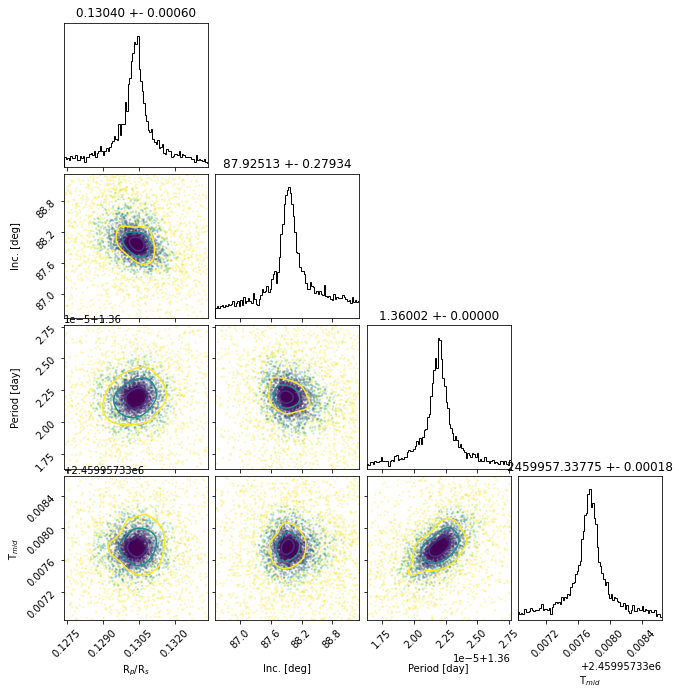

In [16]:
global_fit.plot_triangle()
plt.savefig("posteriors.png",facecolor='white')

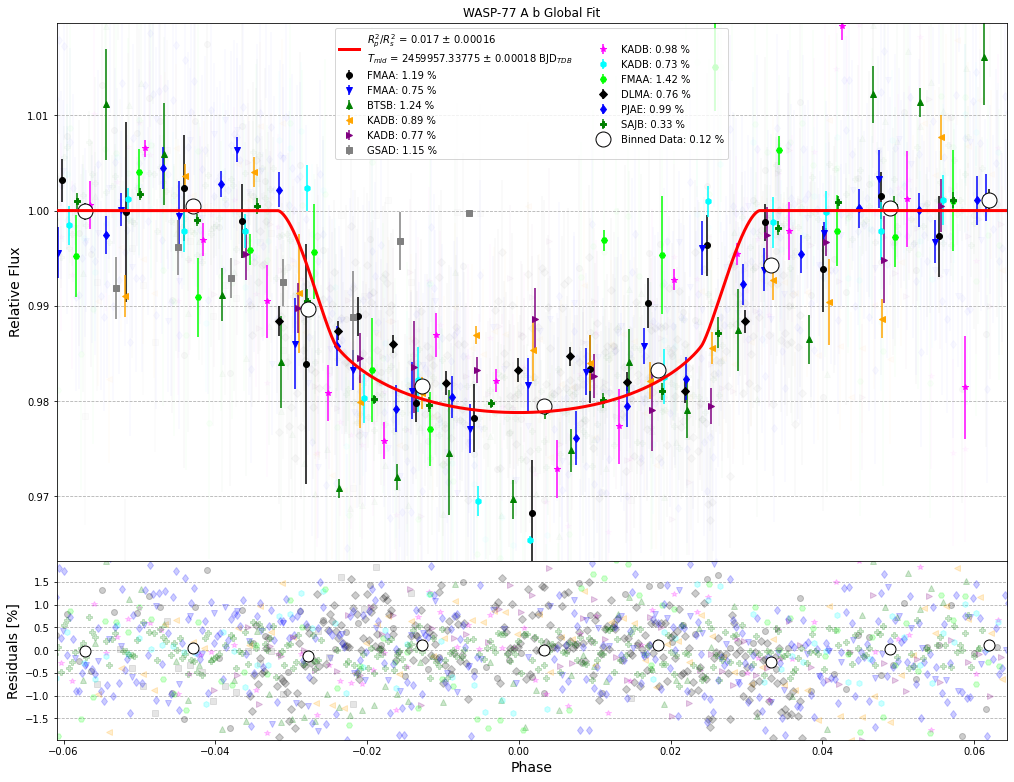

In [17]:
global_fit.plot_bestfit(alpha=0.025, bin_dt = 15./60/24, title=f"{target} Global Fit",phase_limits='median')
plt.savefig("bestfit.png",facecolor='white')

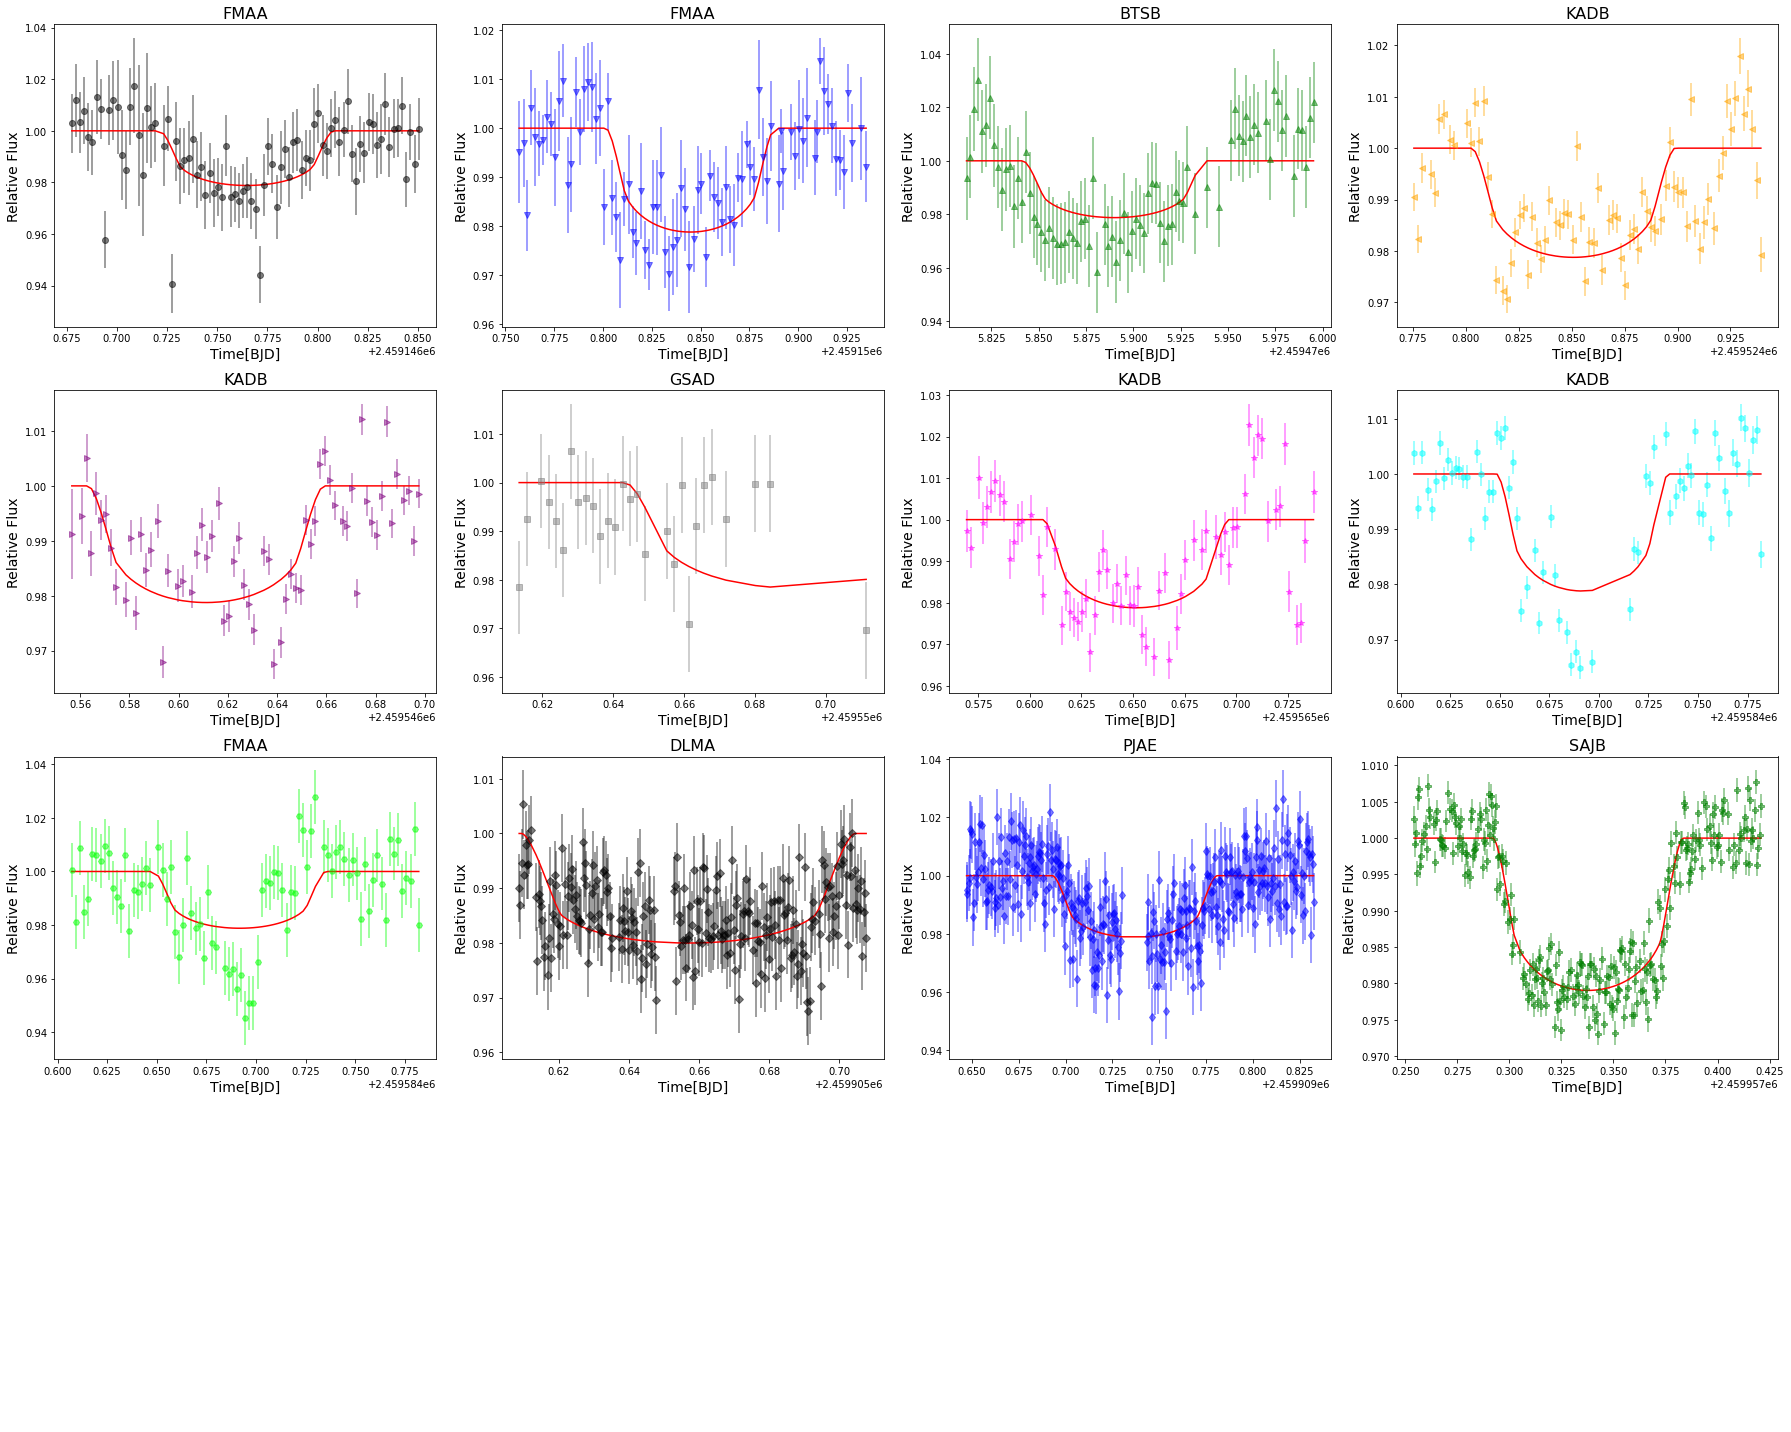

In [18]:
global_fit.plot_bestfits()
plt.savefig("bestfits.png",facecolor='white')
#myfit.plot_stack(dy=0.03)
#plt.savefig("stackfit.png",facecolor='white')

In [19]:
# best-fit parameters from global fit
global_fit.parameters.keys()

dict_keys(['u0', 'u1', 'u2', 'u3', 'ecc', 'inc', 'omega', 'duration', 'tmid', 'a1', 'a2', 'ars', 'rprs', 'per'])

In [20]:
# compare global ephemeris to values from EW
result.ephemeris.keys()

dict_keys(['Tc', 'Tcs', 'files', 'notes', 'Period', 'Tc_err', 'epochs', 'Tcs_err', 'datasets', 'nea_tmids', 'residuals', 'timesaved', 'Period_err', 'nea_epochs', 'nea_tmids_err', 'nea_references', 'ephemeris_url'])

In [21]:
result.ephemeris['nea_tmids']

['2455870.4500266667',
 '2456663.34757',
 '2457420.88439',
 '2457658.8889',
 '2459168.520849']

/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/nested_linear_fitter.py:49: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[ultranest] Sampling 420 live points from prior ...


[ultranest] Explored until L=-1e+02  
[ultranest] Likelihood function evaluations: 7506
[ultranest]   logZ = -109.4 +- 0.1069
[ultranest] Effective samples strategy satisfied (ESS = 1702.1, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.05 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest]   logZ error budget: single: 0.14 bs:0.11 tail:0.01 total:0.11 required:<0.50
[ultranest] done iterating.


/Users/kpearson/Programs/exoplanets/Observing/EXOTIC/exotic/api/nested_linear_fitter.py:173: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(dt)


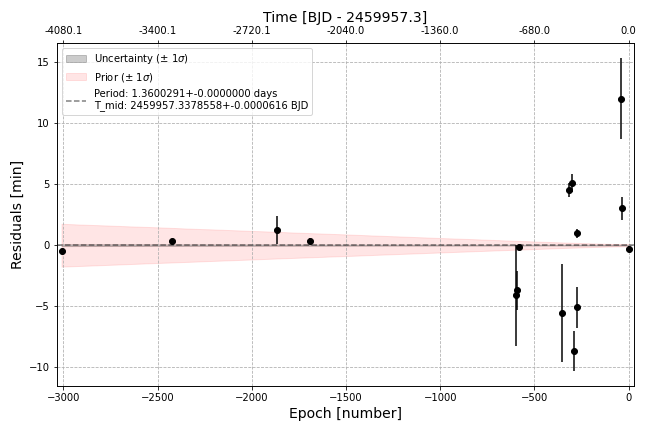

In [22]:
from exotic.api.nested_linear_fitter import linear_fitter

# min and max values to search between for fitting the ephemeris
bounds = {
    'm':[ # orbital period
        global_fit.parameters['per']-10*global_fit.errors['per'], 
        global_fit.parameters['per']+10*global_fit.errors['per']
    ], 
    'b':[ # mid-transit time
        global_fit.parameters['tmid']-10*global_fit.errors['tmid'],
        global_fit.parameters['tmid']+10*global_fit.errors['tmid']
    ] 
}

# used to plot red overlay in O-C figure
prior = {
    'm':[global_fit.parameters['per'], global_fit.errors['per']],   # value from global
    'b':[global_fit.parameters['tmid'], global_fit.errors['tmid']]  # value from WLS
}

# extract data from individual light curves in global fit
tmids = [lcfit['parameters']['tmid'] for lcfit in input_data]
tmids_err = [lcfit['errors']['tmid'] for lcfit in input_data]
rprs2 = [lcfit['parameters']['rprs']**2 for lcfit in input_data]
rprs = [lcfit['parameters']['rprs'] for lcfit in input_data]
rprs_err = [lcfit['errors']['rprs'] for lcfit in input_data]
res_stdev = [lcfit['res_std'] for lcfit in input_data]
name = [lcfit['name'] for lcfit in input_data]
tmids_err = np.array(tmids_err)

# filter bad data
mask = (res_stdev < np.mean(rprs2)) & (np.mean(rprs) > 5 * np.mean(rprs_err)) & (tmids_err*24*60<10)

# apply mask
tmids = np.array(tmids)[mask]
tmids_err = np.array(tmids_err)[mask]

# combine the good data from reprocessing of Exoplanet Watch and NASA Exoplanet Archive
tmids = np.array(list(tmids) + result.ephemeris['nea_tmids'], dtype=float)
tmids_err = np.array(list(tmids_err) + result.ephemeris['nea_tmids_err'], dtype=float)

# fit the data and compare ephemeris to global light curve fit
lf = linear_fitter( tmids, tmids_err, bounds, prior=prior )

fig,ax = lf.plot_oc()
plt.tight_layout()
plt.savefig("oc_global.png",facecolor='white')
plt.close()
Image("oc_global.png")

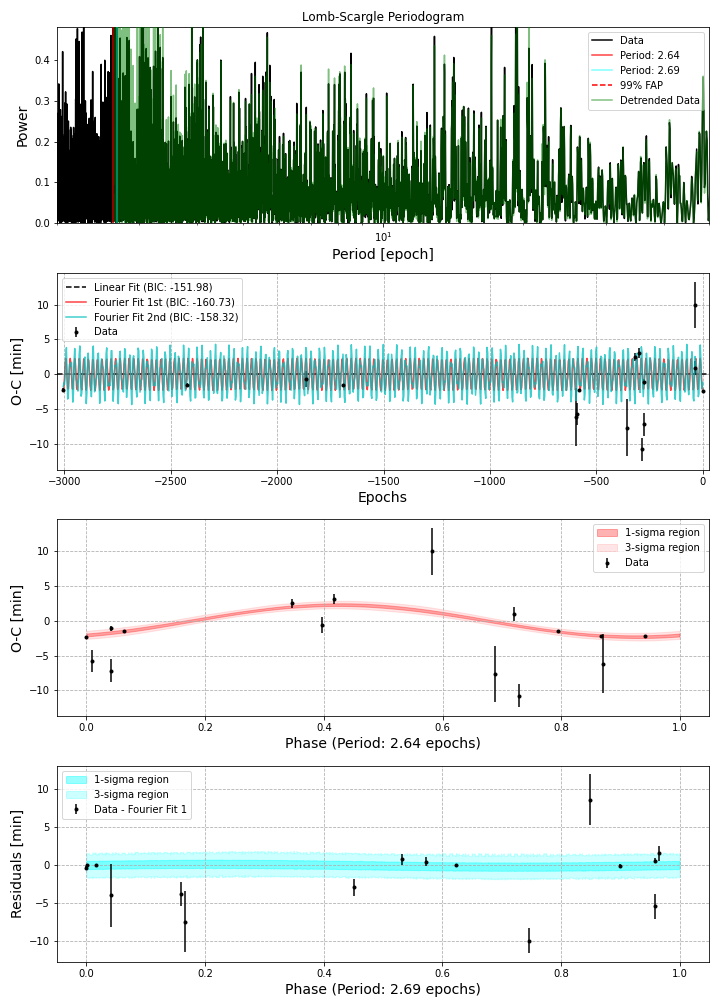

In [23]:
fig,ax = lf.plot_periodogram()
plt.tight_layout()
plt.savefig("plot_periodogram.png",facecolor='white')
plt.close()
Image("plot_periodogram.png")